In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1,l2
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping



In [2]:
def mackeyGlass(beta, gamma, n, tau, tend):
    x = np.empty(tend)
    x[0] = 1.5
    for t in range(1,tend):
        
        xold = x[t-1]
        
        if t-tau < 0:
            xtau = 0
        else:
            xtau = x[t-tau]
        
        
        x[t] = xold + (beta*xtau)/(1+xtau**n)-gamma*xold
            
    return x


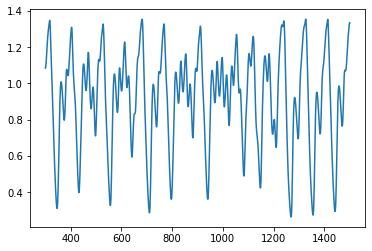

In [3]:
# task 1
beta = 0.2
gamma = 0.1
n = 10
tau = 25
tend = 1506

x = mackeyGlass(beta, gamma, n, tau, tend)
t = np.arange(301,1501)

plt.plot(t,x[t])

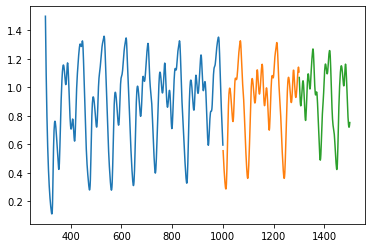

In [9]:
input, output = [], []

for t in range(300, 1500):
    input.append([x[t - 20], x[t - 15], x[t - 10],
                  x[t - 5], x[t]])
    output.append(x[t + 5])
    #input = np.array([x(t-20); x(t-15); x(t-10); x(t-5); x(t)])
#output = np.array(x(t+5))
t = np.arange(301,1501)

input = np.array(input)
output = np.array(output)

ntrain = 700
nvali = 1000
ntest = 1200

patterns_train = input[:ntrain]
targets_train = output[:ntrain]

valiD = input[ntrain:nvali]
valiT = output[ntrain:nvali]

testD = input[nvali:ntest]
testT = output[nvali:ntest]

plt.plot(t[0:ntrain],x[0:ntrain],t[ntrain:nvali],x[ntrain:nvali],t[nvali:ntest],x[nvali:ntest])



In [8]:
def buildModel(nHiddenLayers,n1,n2, reg):
    model = Sequential()
    
    for i in range(nHiddenLayers):
        if i == 0:
            model.add(Dense(n1,
                            input_shape = (5,),
                            use_bias = True,
                            activation = 'sigmoid',
                            kernel_regularizer = l1(reg)
                           ))
        else:
            model.add(Dense(n2,
                            use_bias = True,
                            activation = 'sigmoid',
                            kernel_regularizer = l1(reg)
                           ))            
    model.add(Dense(1,activation = 'linear'))
    sgd = SGD(lr = 0.1, momentum = 0.9)
    model.compile(optimizer=sgd, loss="mse", metrics=["mae"])

    return model
    


In [9]:
# task 2

nHiddenLayers = 2
nHiddenNodes = [[2,4],[2,5,15]]
regs = [0]

for reg in regs:
    
    for n1 in nHiddenNodes[0]:
        for n2 in nHiddenNodes[1]:
            print([n1,n2])

            model = buildModel(nHiddenLayers,n1,n2, reg)
            call = [EarlyStopping(monitor = 'loss',patience = 10,)]
            hist = model.fit(patterns_train,targets_train.T, callbacks = call, epochs=1000, verbose =0)
            ev = model.evaluate(valiD, valiT)

    # [2,5] is best 
    # [2,2] is worst 

[2, 2]
10/10 [==============================] - 0s 2ms/step - loss: 0.0030 - mae: 0.0437
[2, 5]
10/10 [==============================] - 0s 2ms/step - loss: 0.0026 - mae: 0.0419
[2, 15]
10/10 [==============================] - 0s 553us/step - loss: 0.0075 - mae: 0.0698
[4, 2]
10/10 [==============================] - 0s 1ms/step - loss: 0.0026 - mae: 0.0415
[4, 5]
10/10 [==============================] - 0s 1ms/step - loss: 0.0014 - mae: 0.0299
[4, 15]
10/10 [==============================] - 0s 1ms/step - loss: 0.0021 - mae: 0.0379


[2, 2]
10/10 [==============================] - 0s 882us/step - loss: 0.0026 - mae: 0.0401
[2, 5]
10/10 [==============================] - 0s 959us/step - loss: 0.0015 - mae: 0.0314


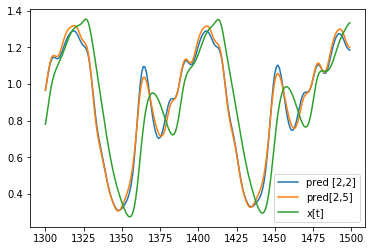

In [86]:
# task 3

nHiddenLayers = 2
nHiddenNodes = [[2],[2,5]]
regs = [0]

i = 0 

for reg in regs:
    
    for n1 in nHiddenNodes[0]:

        for n2 in nHiddenNodes[1]:
            i =+1
            print([n1,n2])
            model = buildModel(nHiddenLayers,n1,n2, reg)
            call = [EarlyStopping(monitor = 'loss',patience = 10,)]
            hist = model.fit(patterns_train,targets_train.T, callbacks = call, epochs=1000, verbose =0)
            ev = model.evaluate(valiD, valiT)

            # predict future 
            pred = model.predict(testD)
            t2 = np.arange(1300,1500)
                        
            # plot stuff 
            
            plt.plot(t2,pred)
        plt.plot(t2,x[t2])
        plt.legend(['pred [2,2]','pred[2,5]','x[t]'])
            


In [107]:
# task 4 Add noise

input = np.array(input)
output = np.array(output)

np.random.seed(0)
input_noise = np.add(input, np.random.normal(0,0.1, size=(len(input),5)))

ntrain = 700
nvali = 1000
ntest = 1200

patterns_train = input_noise[:ntrain]
targets_train = output[:ntrain]

valiD = input_noise[ntrain:nvali]
valiT = output[ntrain:nvali]

testD = input_noise[nvali:ntest]
testT = output[nvali:ntest]


[2, 2]
10/10 [==============================] - 0s 786us/step - loss: 0.0197 - mae: 0.1121
[2, 15]
10/10 [==============================] - 0s 1ms/step - loss: 0.0250 - mae: 0.1280
[2, 2]
10/10 [==============================] - 0s 1ms/step - loss: 0.0176 - mae: 0.1063
[2, 15]
10/10 [==============================] - 0s 777us/step - loss: 0.0211 - mae: 0.1154
[2, 2]
10/10 [==============================] - 0s 1ms/step - loss: 0.0697 - mae: 0.2106
[2, 15]
10/10 [==============================] - 0s 1ms/step - loss: 0.0727 - mae: 0.2129
[2, 2]
10/10 [==============================] - 0s 1ms/step - loss: 0.0893 - mae: 0.2091
[2, 15]
10/10 [==============================] - 0s 1ms/step - loss: 0.1215 - mae: 0.2224


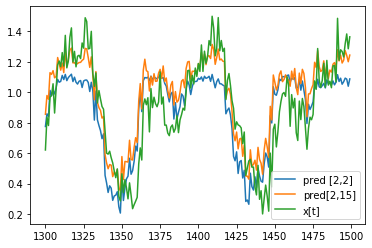

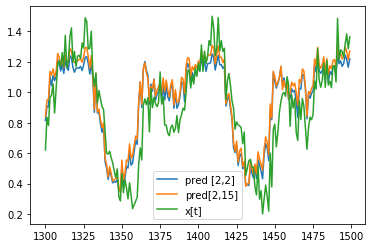

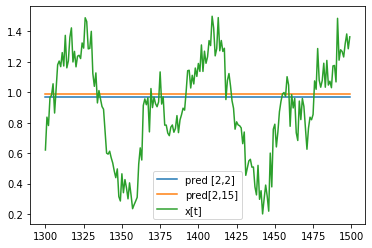

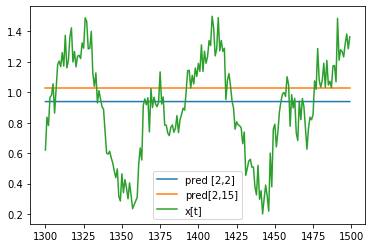

In [109]:
nHiddenLayers = 2
nHiddenNodes = [[2],[2,15]]
regs = [0, 0.00001, 0.01,0.1]

i = 0 
j = 0 


for reg in regs:
    plt.figure()
    for n1 in nHiddenNodes[0]:

        for n2 in nHiddenNodes[1]:
            i =+1
            print([n1,n2])
            model = buildModel(nHiddenLayers,n1,n2, reg)
            call = [EarlyStopping(monitor = 'loss',patience = 10,)]
            hist = model.fit(patterns_train,targets_train.T, callbacks = call, epochs=1000, verbose =0)
            ev = model.evaluate(valiD, valiT)

            # predict future 
            pred = model.predict(testD)
            t2 = np.arange(1300,1500)
                        
            # plot stuff 
            
            plt.plot(t2,pred)
        plt.plot(t2,input_noise[nvali:ntest,4])
        plt.legend(['pred [2,2]','pred[2,15]','x[t]'])

